# Isling Model

In [13]:
from ising import Ising
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [14]:
# Initialise Variables
L, B, J, beta = 100, 0, 0.3, 1

num_therm = 500

mag_per_spin_arr = np.zeros(num_therm)
visual_arr = []

# Initialise the Ising Model with the Constants

In [15]:
ising = Ising(L,J,B, beta)


# Do Thermalisation Sweeps and keep track of Mag per Spin

In [16]:
for i in range(num_therm):
    ising.do_thermalisation_sweep()
    mag_per_spin_arr[i] = ising.get_mag_per_spin()
    ising.visualise(i)

In [17]:
def calculate_running_average(arr, n):
    return np.convolve(arr, np.ones((n))/n, mode='valid')

def flatten_point(running_avg, threshold):
    diff = np.diff(running_avg)
    flatten_point = np.where(np.abs(diff) < threshold)[0]
    if flatten_point.size > 0:
        return flatten_point[0]
    else:
        return len(running_avg)



rav = calculate_running_average(mag_per_spin_arr, 5)
threshold = 0.001
fp = flatten_point(rav, threshold)


# Plot Magnetisation per spin against Thermalisation

Average magnetisation per spin: -0.002 ± 0.001
Flatten point: 40


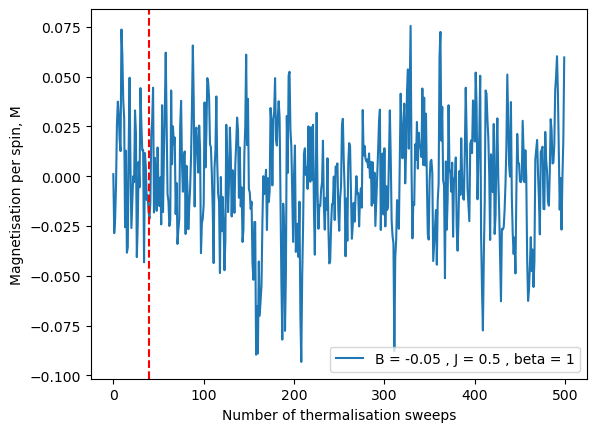

interactive(children=(IntSlider(value=0, description='i', max=499), Output()), _dom_classes=('widget-interact'…

In [18]:

# plot magnetisation per spin array against numper of thermalisation sweeps
plt.plot(mag_per_spin_arr, label="B = -0.05 , J = 0.5 , beta = 1")
plt.xlabel("Number of thermalisation sweeps")
plt.ylabel("Magnetisation per spin, M")
plt.legend()

# plot flattening point on the plot
plt.axvline(fp, color='r', linestyle='--')

avg_mag = np.mean(mag_per_spin_arr[fp:])
std_err = np.std(mag_per_spin_arr[fp:])/np.sqrt(len(mag_per_spin_arr[fp:]))

# print average magnetisation per spin and standard error to 3 significant figures
print(f"Average magnetisation per spin: {avg_mag:.3f} ± {std_err:.3f}")
print(f"Flatten point: {fp}")

# Create a slider to select the thermalisation sweep to display
slider = widgets.IntSlider(min=0, max=num_therm-1, step=1, value=0)

# Display the slider and the corresponding thermalisation sweep
def update_visualisation(i):
    display(ising.visualisations[i])

widgets.interactive(update_visualisation, i=slider)
